hello
[[0.4796354]] [20.73441764]


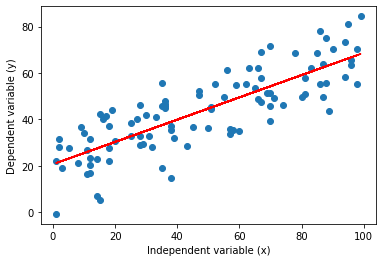

In [302]:
#Creating a dataset
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from time import perf_counter
print ("hello")
x=np.random.randint(100, size=(100))
c=np.random.normal(20,10, size=100)
y=0.5*x+c
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

reg = LinearRegression().fit(X, Y)
w = reg.coef_
b = reg.intercept_
print(w,b)
fit=float(w)*x+float(b)

plt.scatter(x, y)
plt.plot(x,fit,'-r', label='Linear regression fit')
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
plt.show()


In [334]:
#Batch Gradient Descent
#guess the parameters
par=(-10,50)
#defining gradient function
def grad(x,y,par):
    gradm = 0
    gradc = 0
    N = np.size(x)

    for i in range(N):
        gradm += x[i]*(par[0]*x[i]+par[1] -y[i])
        gradc += (par[0]*x[i]+par[1] -y[i])

    return np.array(list(map(lambda x:2*x/N,(gradm,gradc))))
#defining the updating function
def updates(x,y,par,iter=1,alpha = 0.0001*np.ones(2),epsilon = np.array([0.01,0.02]),lim=50):
    g = grad(x,y,par)
    alphadelta = np.multiply(alpha,g)
    #print(g)
    # print(alphadelta)
    alpha[1] = abs(g[1]/g[0])#the alpha value was changing m very rapidly while keeping c unchnaged.Hence to change the rate at which c converges, we change the learning parameter for c in proportion to the ratios between the changes in both the variables
    if (np.all(np.less(np.absolute(g),epsilon)) == True) or (iter>lim):
        return (par,iter)

    else:
        return updates(x,y,np.subtract(par,alphadelta),iter+1,alpha,epsilon,lim)
print('The slope obtained with 50 epochs using batch gradient descent is {0} and the y intercept is {1}'.format(*tuple(np.around(updates(x,y,par)[0],3))))
print('The slope obtained with 500 epochs using batch gradient descent is {0} and the y intercept is {1}'.format(*tuple(np.around(updates(x=x,y=y,par=par,lim=500)[0],3))))
    


The slope obtained with 50 epochs using batch gradient descent is 0.367 and the y intercept is 27.742
The slope obtained with 500 epochs using batch gradient descent is 0.48 and the y intercept is 20.736


In [337]:
#Mini batch gradient descent
#first break them up into batches
N=len(x)
perm = np.random.permutation(N)
def minbatch_gd(x,y,par,batchsize,perm, iter=1,alpha = 0.0001*np.ones(2),epsilon = np.array([0.01,0.02]),lim=50):
    N=len(x)
    x[perm]
    y[perm]
    z=par + 2*epsilon
    i=0
    #return updates(x[5:batchsize+5],y[5:batchsize+5],updates(x[0:batchsize],y[0:batchsize],par,1,alpha ,epsilon,1)[0],1,alpha ,epsilon,1)[0]
    while i<N :
        z = par
        par = updates(x[i:i+batchsize],y[i:i+batchsize],z,1,alpha ,epsilon,1)[0]
        #print(par)
        i+=batchsize
    #return(par)
    if (np.all(np.less(np.absolute((par-z)/alpha),epsilon)) == True) or (iter>lim):
        return (par,iter)

    else:
        return minbatch_gd(x,y,par,batchsize,perm, iter+1,alpha,epsilon,lim)
print('The slope obtained with 50 epochs using mini-batch gradient descent with batch size as 10 is {0} and the y intercept is {1}'.format(*tuple(np.around(minbatch_gd(x,y,par,10,perm)[0],3))))  
    





The slope obtained with 50 epochs using mini-batch gradient descent with batch size as 10 is 0.578 and the y intercept is 17.901


In [338]:
#Stochastic gradient descent
def stochastic_gd(x,y,par, iter=1,alpha = 0.0001*np.ones(2),epsilon = np.array([0.01,0.02]),lim=50):
    N=len(x)
    perm = np.random.permutation(N)
    par=minbatch_gd(x,y,par,2,perm)[0]
    if (iter>lim):
        return (minbatch_gd(x,y,par,2,perm,1,alpha,epsilon,1)[0],iter)

    else:
        return stochastic_gd(x,y,par,iter+1,alpha,epsilon,lim)
print('The slope obtained with 50 epochs using stochastic gradient descent is {0} and the y intercept is {1}'.format(*tuple(np.around(stochastic_gd(x,y,par)[0],3))))  


The slope obtained with 50 epochs using stochastic gradient descent is 0.35 and the y intercept is 28.38


We observe that although the result obtained from batch gradient descent is not close to the linear fit, it converges if we increase the number of epochs while in the case of stochastic descent, even though the error is relatively less, it oscillates about the linear fit value with every epoch.